This notebook is for fitting Kmeans model on the general German population principal components, applying the model to the customers principal components and analyzing what features make a person more likely to be a customer.

# Load data and packages

In [70]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.set_option('max_colwidth', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('max_rows', 400)

In [3]:
data = pd.read_csv("general_pca_0308.csv")

# Fit Kmeans to principal components of German general population data

In [4]:
def fit(center, data):
    print(f"Numbers of centers: {center}")
    k = KMeans(center).fit(data)
    s = k.score(data)
    return abs(s)

In [6]:
nums_clusters = [i for i in range(1,10,2)]
scores = [fit(c, data) for c in nums_clusters]

Numbers of centers: 1
Numbers of centers: 3
Numbers of centers: 5
Numbers of centers: 7
Numbers of centers: 9


Text(0.5, 1.0, 'SSE vs. K')

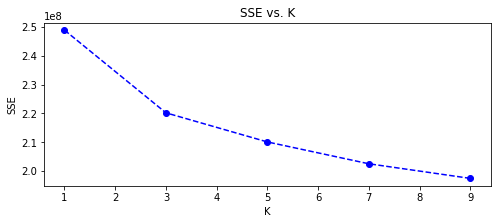

In [7]:
plt.rcParams['figure.figsize'] = (8, 3)
plt.plot(nums_clusters, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')

We decided to create 6 clusters

In [9]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(6).fit(data)

(array([ 97332.,      0., 136315.,      0., 156852.,      0., 192899.,
             0., 140217., 167606.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

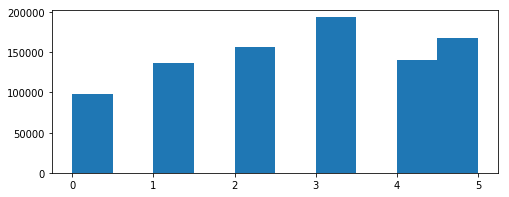

In [10]:
plt.hist(kmeans.labels_)

In [11]:
data['kmeans_label'] = kmeans.labels_

# Explain the clusters

In [12]:
important_features_pd = pd.read_csv("important_features.csv")

In [14]:
general_small = pd.read_csv("general_important_features.csv")

In [15]:
general_small['kmeans_label'] = data['kmeans_label']

Text(0.5, 1.0, 'Average values for important variables')

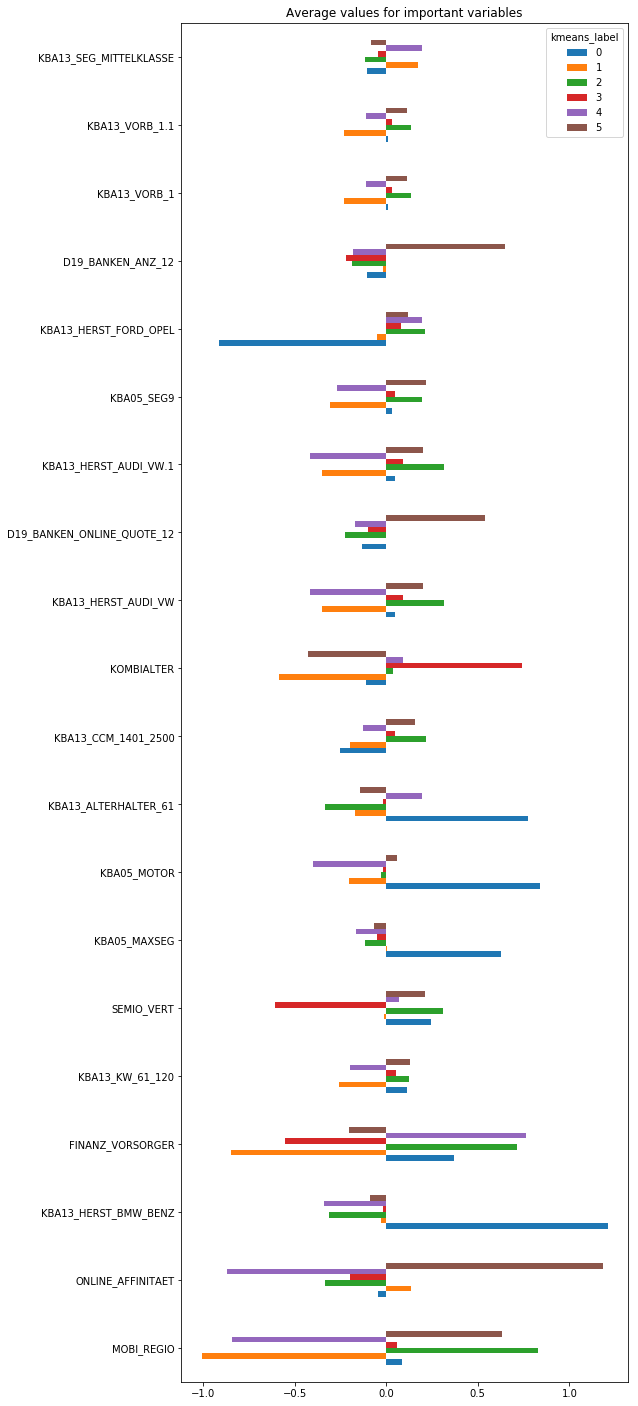

In [32]:
plt.rcParams['figure.figsize'] = (8, 25)
general_small.groupby('kmeans_label').mean().T.plot.barh()
plt.title("Average values for important variables")

In [34]:
important_features_pd

,feature,description,original_feature,component,value__meaning
0,MOBI_REGIO,moving patterns,MOBI_REGIO,0,"['1__very high mobility', '2__high mobility', '3__middle mobility', '4__low mobility', '5__very low mobility ', '6__none']"
1,PLZ8_ANTG1,number of 1-2 family houses in the PLZ8,PLZ8_ANTG1,0,"['-1__unknown', '0__none', '1__low share', '2__average share', '3__high share', '4__very high share']"
2,ONLINE_AFFINITAET,online affinity,ONLINE_AFFINITAET,1,"['0__none', '1__low', '2__middle', '3__high', '4__very high', '5__highest ']"
3,D19_GESAMT_ANZ_24,transaction activity TOTAL POOL in the last 24 months,D19_GESAMT_ANZ_24,1,"['0__no transactions known', '1__very low activity', '2__low activity', '3__slightly increased activity', '4__increased activity', '5__high activity', '6__very high activity']"
4,KBA13_HERST_BMW_BENZ,share of BMW & Mercedes Benz within the PLZ8,KBA13_HERST_BMW_BENZ,2,"['-1__unknown', '0__none', '1__very low', '2__low', '3__average', '4__high', '5__very high']"
5,KBA13_SEG_OBEREMITTELKLASSE,"share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)",KBA05_SEG5,2,"['-1, 9__unknown', '0__none', '1__very low', '2__low', '3__average', '4__high']"
6,FINANZ_VORSORGER,financial typology: be prepared,FINANZ_VORSORGER,3,"['-1__unknown', '1__very high', '2__high', '3__average', '4__low', '5__very low']"
7,ALTERSKATEGORIE_GROB,age classification through prename analysis,ALTERSKATEGORIE_GROB,3,"['-1, 0__unknown', '1__< 30 years', '2__30 - 45 years', '3__46 - 60 years', '4__> 60 years', '9__uniformly distributed']"
8,KBA13_KW_61_120,share of cars with an engine power between 61 and 120 KW - PLZ8,KBA13_KW_61_120,4,"['-1__unknown', '0__none', '1__very low', '2__low', '3__average', '4__high', '5__very high']"
9,KBA13_KMH_210,share of cars with max speed 110 km/h within the PLZ8,KBA13_KMH_110,4,"['-1__unknown', '0__none', '1__very low', '2__low', '3__average', '4__high', '5__very high']"


> ### Explanation

- **0** : **Low share of Ford & Opel/Vauxhall within the PLZ8;** Low share of cars with less than 1000ccm within the PLZ8; **High share of car owners elder than 61 within the PLZ8; most common engine size in the microcell -- Big engine; **most common car segment in the microcell -- Upper class;** Low affinity indicating in what way the person is dreamily; Low financial typology: be prepared; **High share of BMW & Mercedes Benz within the PLZ8**
- **1** : **High financial typology: be prepared;** High share of middle class cars (Ford Mondeo etc.) in the PLZ8; Low share of cars with 1 preowner - PLZ8; Low share of vans in the microcell; Low share of Volkswagen & Audi within the PLZ8; Low share of cars with less than 1000ccm within the PLZ8; Low share of car owners elder than 61 within the PLZ8; Most common engine size in the microcell -- Small;  **High moving patterns**
* **2**: **Low financial typology: be prepared;** High share of vans in the microcell; Low transaction activity BANKS in the last 12 months; High share of Volkswagen & Audi within the PLZ8; High share of cars with less than 1000ccm within the PLZ8; Low share of car owners elder than 61 within the PLZ8; most common car segment in the microcell -- Lower class; Low affinity indicating in what way the person is dreamily;  Low share of BMW & Mercedes Benz within the PLZ8; Low online affinity; **Low moving patterns**
* **3**: **High affinity indicating in what way the person is dreamily;** **High financial typology: be prepared;** Low transaction activity BANKS in the last 12 months;   Low online affinity
* **4**: **Low financial typology: be prepared;** High share of middle class cars (Ford Mondeo etc.) in the PLZ8; Low share of vans in the microcell; Low transaction activity BANKS in the last 12 months; Low share of Volkswagen & Audi within the PLZ8; Low share of cars with less than 1000ccm within the PLZ8; High share of car owners elder than 61 within the PLZ8; Most common engine size in the microcell -- Small; most common car segment in the microcell -- Lower class;  Low share of BMW & Mercedes Benz within the PLZ8; **Low online affinity; High moving patterns**
* **5**: **High transaction activity BANKS in the last 12 months; High amount of online transactions within all transactions in the segment bank** High share of vans in the microcell; High share of Volkswagen & Audi within the PLZ8; High share of cars with less than 1000ccm within the PLZ8; Low share of car owners elder than 61 within the PLZ8; Low affinity indicating in what way the person is dreamily; High financial typology: be prepared; **High online affinity; Low moving patterns**

# Apply the Kmeans model to customers principal components

In [22]:
customers = pd.read_csv("customers_pca_0308.csv")

In [23]:
customers['kmeans_label'] = kmeans.predict(customers)

# Compare customers and the general populations

Compared to general population, customers are more from cluster 0, 2, 3, and 5. 

Text(0.5, 1.0, 'Cluster distribution among general population and customers')

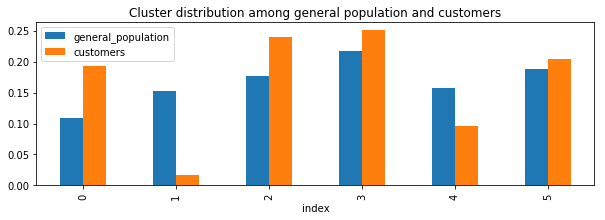

In [37]:
plt.rcParams['figure.figsize'] = (10, 3)

cluster_distribution = data['kmeans_label'].value_counts(normalize=True).reset_index()\
                                .merge(customers['kmeans_label'].value_counts(normalize=True).reset_index(), on="index")\
                                .rename({'kmeans_label_x':'general_population', 'kmeans_label_y':'customers'}, axis=1)\
                                .sort_values('index')\
                                .set_index('index')

cluster_distribution.plot.bar()
plt.title("Cluster distribution among general population and customers")

Comparing the clusters distributions of the general population and customers. We can see that people from cluster  0 are very likely to be customers. These people have lower share of Ford & Opel/Vauxhall within the PLZ8, but higher share of BMW & Mercedes Benz within the PLZ8 and higher share of car owners elder than 61 within the PLZ8; The most common engine size in the microcell is more likely to be bigger engine; The most common car segment in the microcell is more likely to be upper class cars; __We can infer that people in cluster 0 are older, rich, upper class people who prefer BMW & Mercedes Benz and cars with bigger engines.__

Cluster 1 is much less likely to be customers. These people are more likely to have high financial typology -- be prepared, high moving patterns, high share of middle class cars (Ford Mondeo etc.) in the PLZ8, and low share of a lot of other important variables we are looking at. __These people are more like younger middle class while their degrees of "financial typology be prepared" are high. They also have high moving patterns.__

Cluster 2 and 3 are also more likely to be customers, while these clusters might be very different from each other. People in clusters 2 have low degree of "financial typology be prepared" and low moving patterns; People in cluster 3 have high affinity indicating in what way the person is dreamily and have high degree of "financial typology be prepared".

In [71]:
with open("kmeans.p", 'wb') as pickle_file:
    pickle.dump(kmeans, pickle_file)